## Introduction
Each one of us harbors ten times more microbial cells than our own human cells. These commensals (organisms that live with you) govern a range of functions in health, disease and our behaviour. Some of the functions they are involved in are food digestion, drug metabolism, regulating metabolic rate, immunity, memory, behavior and obesity. The human microbiome is the genetic make up of all these microbial colonisers in our bodies. This sea of microbes includes bacteria, fungi, viruses, archaea and protists. The genetic difference between any two of us is miniscule but the difference imparted by our microbial colonies can be vast. Due to its large impact in human health and survival, the National Institutes of Health launched the Human Microbiome Project (HMP) in 2008 to characterize human microbiota and elucidate its role in health and disease. This humongous project involved 300 scientists from over 80 organizations. Samples for their analysis came from both healthy and sick individuals and the data was made public.

### Objective 
Here, we will try to answer some interesting questions, such as -
i) Human body site showing most microbial diversity 
ii) The most common genus (taxonomic rank that comes above species) of microorganism found in the human body
iii) Most ubiquitous microbe in the human body


### Import the necessary modules 
Import the necessary modules and read the data. 

In [2]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

micro=pd.read_csv('project_catalog.csv')
pd.set_option('display.max_rows', None, 'display.max_columns', None)


We then check how the data looks like by checking its the shape, its columns and the amount of missing data.

In [3]:
micro.shape

(2915, 17)

In [4]:
micro.columns 

Index(['HMP ID', 'GOLD ID', 'Organism Name', 'Domain', 'NCBI Superkingdom',
       'HMP Isolation Body Site', 'Project Status', 'Current Finishing Level',
       'NCBI Submission Status', 'NCBI Project ID', 'Genbank ID', 'Gene Count',
       'IMG/HMP ID', 'HOMD ID', 'Sequencing Center', 'Funding Source',
       'Strain Repository ID'],
      dtype='object')

In [5]:
micro.head(2)

HMP ID  GOLD ID                        Organism Name     Domain  \
0       1  Gi03551     Abiotrophia defectiva ATCC 49176  BACTERIAL   
1       4  Gi03555  Achromobacter piechaudii ATCC 43553  BACTERIAL   

  NCBI Superkingdom HMP Isolation Body Site Project Status  \
0          Bacteria                    oral       Complete   
1          Bacteria                 airways       Complete   

                Current Finishing Level  \
0  Level 3: Improved-High-Quality Draft   
1           Level 2: High-Quality Draft   

                             NCBI Submission Status  NCBI Project ID  \
0  6. annotation (and sequence) public on NCBI site            33011   
1  6. annotation (and sequence) public on NCBI site            46343   

     Genbank ID  Gene Count  IMG/HMP ID        HOMD ID  \
0  ACIN00000000        1950   643886181  HOMD: tax_389   
1  ADMS00000000        5755   647000200            NaN   

                                Sequencing Center  \
0  Washington University Genome Sequencing Center   
1                      Baylor College of Medicine   

                 Funding Source             Strain Repository ID  
0  NIH-HMP Jumpstart Supplement           ATCC 49176, CIP 103242  
1  NIH-HMP Jumpstart Supplement  ATCC 43553, CIP 55774, LMG 6100

In [6]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 17 columns):
HMP ID                     2915 non-null int64
GOLD ID                    1783 non-null object
Organism Name              2915 non-null object
Domain                     2712 non-null object
NCBI Superkingdom          2751 non-null object
HMP Isolation Body Site    2915 non-null object
Project Status             2915 non-null object
Current Finishing Level    1579 non-null object
NCBI Submission Status     2915 non-null object
NCBI Project ID            2915 non-null int64
Genbank ID                 1579 non-null object
Gene Count                 2915 non-null int64
IMG/HMP ID                 2915 non-null int64
HOMD ID                    397 non-null object
Sequencing Center          2911 non-null object
Funding Source             2915 non-null object
Strain Repository ID       1377 non-null object
dtypes: int64(4), object(13)
memory usage: 387.2+ KB


In [7]:
micro['Organism Name'].nunique()

2906

the size of dataframe is 2915, 17 but there are 2906 unique organisms.so, we need to drop duplicates

In [8]:
micro.drop_duplicates(inplace=False)

HMP ID    GOLD ID                                      Organism Name  \
0          1    Gi03551                   Abiotrophia defectiva ATCC 49176   
1          4    Gi03555                Achromobacter piechaudii ATCC 43553   
2          5    Gi03554                     Achromobacter xylosoxidans C54   
3         10    Gi03422                 Acinetobacter baumannii ATCC 19606   
4         12    Gi03421                Acinetobacter calcoaceticus RUH2202   
5         13    Gi03424                            Acinetobacter sp. SH024   
6         14    Gi03423                          Acinetobacter sp. RUH2624   
7         15    Gi02597              Acinetobacter haemolyticus ATCC 19194   
8         16    Gi03420                      Acinetobacter johnsonii SH046   
9         17    Gi03418                        Acinetobacter lwoffii SH145   
10        18    Gi03417                 Acinetobacter radioresistens SH164   
11        19    Gi03900                  Acinetobacter radioresistens SK82   
12        20    Gi03494                    Acinetobacter baumannii 6013113   
13        21    Gi03495                    Acinetobacter baumannii 6013150   
14        22    Gi03496                    Acinetobacter baumannii 6014059   
15        23    Gi02599                       Acinetobacter sp. ATCC 27244   
16        26    Gi03419                          Acinetobacter junii SH205   
17        27    Gi03558                    Actinobacillus ureae ATCC 25976   
18        43    Gi03560              Actinobaculum P1 oral taxon 183 F0552   
19        44    Gi02601                   Actinomyces coleocanis DSM 15436   
20        45    Gi03828                       Actinomyces graevenitzii C83   
21        50    Gi01705               Actinomyces odontolyticus ATCC 17982   
22        51    Gi03829                     Actinomyces odontolyticus C702   
23        58    Gi02602                 Actinomyces urogenitalis DSM 15434   
24        59    Gi03830                          Actinomyces viscosus C505   
25        61    Gi02603                     Aerococcus viridans ATCC 11563   
26        63    Gi02604                    Aeromicrobium marinum DSM 15272   
27        67        NaN              Anaerovorax sp. ORNL_6EZ5-Gt_3_Pl1-27   
28        68    Gi02606                           Alistipes sp. 10_1_37FAA   
29        69    Gi02070                     Alistipes putredinis DSM 17216   
30        70        NaN             Anaerovorax sp. ORNL_6EZ5-Gt_3_Pl2-127   
31        71    Gi02608                 Anaerococcus hydrogenalis DSM 7454   
32        72    Gi02610               Anaerococcus lactolyticus ATCC 51172   
33        76    Gi03599                           Anaerococcus sp. S9 PR-5   
34        77    Gi02612                  Anaerococcus tetradius ATCC 35098   
35        78    Gi03600                  Anaerococcus vaginalis ATCC 51170   
36        79    Gi02071             Anaerofustis stercorihominis DSM 17244   
37        80    Gi03601                       Anaeroglobus geminatus F0357   
38        81    Gi01713                      Anaerostipes caccae DSM 14662   
39        82    Gi02072                Anaerotruncus colihominis DSM 17241   
40        83    Gi02613        Aneurinibacillus aneurinilyticus ATCC 12856   
41        86    Gi03355                         Atopobium rimae ATCC 49626   
42        91    Gi02616                        Atopobium vaginae DSM 15829   
43       101    Gi02635                             Bacteroides sp. 2_1_16   
44       102    Gi02636                             Bacteroides sp. 2_1_22   
45       104    Gi02643                             Bacteroides sp. 3_1_19   
46       107        NaN            Bacteroidales bacterium ORNL_2OR_SD_356   
47       108        NaN           Bacteroidetes bacterium ORNL_1UT_ORNL_28   
48       109    Gi01709                      Bacteroides caccae ATCC 43185   
49       110    Gi01714                  Bacteroides capillosus ATCC 29799   
50       111    Gi03226     

In [10]:
micro.shape

(2915, 17)

In [12]:
micro['Organism Name'].duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [9]:
micro=micro.drop(micro[micro['Organism Name'].duplicated()].index)

In [10]:
micro.shape

(2906, 17)

We then check the statistics for Gene count (it has no missing data). From this, it is evident that minimum gene count is 0. How?

In [11]:
micro['Gene Count'].describe()

count    2906.000000
mean     1475.212319
std      1653.823359
min         0.000000
25%         0.000000
50%      1520.000000
75%      2489.750000
max      8490.000000
Name: Gene Count, dtype: float64

In [12]:
micro['Gene Count'].sum()

4286967

Digging further it is evident that 1331 microbes have 0 gene count followed by 8 eukaryotes and 6 viruses. 

In [13]:
micro_gene_count=micro[micro['Gene Count']==0]
micro_gene_count['NCBI Superkingdom'].value_counts()

Bacteria     1326
Eukaryota       8
Viruses         6
Name: NCBI Superkingdom, dtype: int64

I was curious to check if the reason of 0 gene count is correlated with the project status. It appears that the reason behid 0 gene count  for 1284bacteria, 4 eukaryotes, 1virus could be that the pojects are still in progress (when they released the data).

In [14]:
micro_no_gene_progress= micro[(micro['Gene Count']==0) & (micro['Project Status']=='In Progress')]
micro_no_gene_progress['NCBI Superkingdom'].value_counts()

Bacteria     1281
Eukaryota       4
Viruses         1
Name: NCBI Superkingdom, dtype: int64

But for 47 bacteria, 5 viruses, 4 eukaryotes the project has been completed. Thus, the reason could be a reporting error.

In [15]:
micro_no_gene_complete=micro[(micro['Gene Count']==0) & (micro['Project Status']=='Complete')]
micro_no_gene_complete['NCBI Superkingdom'].value_counts()

Bacteria     45
Viruses       5
Eukaryota     4
Name: NCBI Superkingdom, dtype: int64

Next, I found out that the microorganism with the highest gene count is *Streptomyces* sp. HGB0020, with 8490 genes and which lives in the gastrointestinal tract.

In [16]:
micro[micro['Gene Count']==8490]

HMP ID  GOLD ID             Organism Name     Domain NCBI Superkingdom  \
679    1211  Gi10716  Streptomyces sp. HGB0020  BACTERIAL          Bacteria   

    HMP Isolation Body Site Project Status      Current Finishing Level  \
679  gastrointestinal_tract       Complete  Level 2: High-Quality Draft   

                               NCBI Submission Status  NCBI Project ID  \
679  6. annotation (and sequence) public on NCBI site            72491   

       Genbank ID  Gene Count  IMG/HMP ID HOMD ID Sequencing Center  \
679  AGER00000000        8490           0     NaN   Broad Institute   

                Funding Source Strain Repository ID  
679  NIH-HMP Sequencing Center           BEI HM-789

Next, I found that the research found 16 human body sites, with most diversity shown in the gastrointestinal tract.

In [17]:
micro['HMP Isolation Body Site'].nunique()

16

In [18]:
micro['HMP Isolation Body Site'].value_counts()

gastrointestinal_tract    742
unknown                   649
urogenital_tract          529
oral                      346
skin                      267
airways                   236
blood                      75
bone                       27
other                      13
eye                         8
ear                         4
wound                       4
heart                       2
nose                        2
liver                       1
lymph_nodes                 1
Name: HMP Isolation Body Site, dtype: int64

In [28]:
micro[micro['HMP Isolation Body Site']=='liver']

HMP ID  GOLD ID                                      Organism Name  \
540    1049  Gi08976  Fusobacterium necrophorum subsp. funduliforme ...   

        Domain NCBI Superkingdom HMP Isolation Body Site Project Status  \
540  BACTERIAL          Bacteria                   liver       Complete   

         Current Finishing Level  \
540  Level 2: High-Quality Draft   

                               NCBI Submission Status  NCBI Project ID  \
540  6. annotation (and sequence) public on NCBI site            75137   

       Genbank ID  Gene Count  IMG/HMP ID HOMD ID          Sequencing Center  \
540  AJSY00000000        2060           0     NaN  J. Craig Venter Institute   

    Funding Source Strain Repository ID          Genus      species  
540        NIH-HMP           ATCC 51357  Fusobacterium  necrophorum

In [27]:
micro[micro['HMP Isolation Body Site']=='liver']['Organism Name']

540    Fusobacterium necrophorum subsp. funduliforme ...
Name: Organism Name, dtype: object

In [29]:
micro[micro['HMP Isolation Body Site']=='lymph_nodes']['Organism Name']

2679    Enterococcus faecalis TX4248
Name: Organism Name, dtype: object

In [19]:
# total sum of the above organisms in these locations is 2906, so each microbe present in its unique home

Text(0.5,1,'Diversity of microorganisms at different body sites')

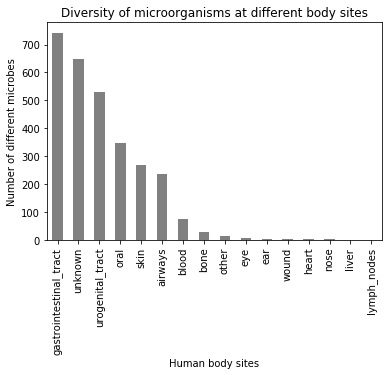

In [20]:
micro['HMP Isolation Body Site'].value_counts().plot(kind='bar', color='grey')
plt.title('Distribution of microorganisms in various body sites')
plt.ylabel('Number of different microbes')
plt.xlabel('Human body sites')
plt.title('Diversity of microorganisms at different body sites')

Next, I was interested in finding the most common genus. A scientific name is made up of 2 parts - genus name followed by scientific name.

In [21]:
micro['Genus']= micro['Organism Name'].str.split(' ').str[0]
micro['species']=micro['Organism Name'].str.split(' ').str[1]
micro[['Genus','species']].head()

Genus        species
0    Abiotrophia      defectiva
1  Achromobacter     piechaudii
2  Achromobacter   xylosoxidans
3  Acinetobacter      baumannii
4  Acinetobacter  calcoaceticus

There are 242 genera found, with *Streptococcus* being the most common genus in the human body.

In [22]:
micro['Genus'].nunique()

242

In [23]:
micro['Genus'].value_counts().head(10)

Streptococcus        268
Staphylococcus       260
Enterococcus         178
Corynebacterium      132
Propionibacterium    104
Lactobacillus         97
Clostridium           93
Prevotella            83
Bacteroides           73
Helicobacter          70
Name: Genus, dtype: int64

In [24]:
micro['Genus'].value_counts().tail(10)

Dermacoccus           1
Sporosarcina          1
Dolosigranulum        1
Paenisporosarcina     1
Anaeroglobus          1
Johnsonella           1
Desulfitobacterium    1
Firmicutes            1
Pseudoramibacter      1
Mucor                 1
Name: Genus, dtype: int64

In [25]:
micro[micro['Genus']=='Streptococcus']['HMP Isolation Body Site'].nunique()

10

In [26]:
micro['Genus'].nunique()

242

Before proceeding further, I checked for the unique values in 'NCBI Superkingdom' column. There are 3 observations labeled 'Error!!!' for this column.

In [28]:
micro.groupby('NCBI Superkingdom').count()

HMP ID  GOLD ID  Organism Name  Domain  \
NCBI Superkingdom                                           
Archaea                 2        2              2       2   
Bacteria             2723     1648           2723    2538   
Error!!!                3        3              3       3   
Eukaryota               8        8              8       8   
Viruses                 6        0              6       6   

                   HMP Isolation Body Site  Project Status  \
NCBI Superkingdom                                            
Archaea                                  2               2   
Bacteria                              2723            2723   
Error!!!                                 3               3   
Eukaryota                                8               8   
Viruses                                  6               6   

                   Current Finishing Level  NCBI Submission Status  \
NCBI Superkingdom                                                    
Archaea                                  2                       2   
Bacteria                              1442                    2723   
Error!!!                                 3                       3   
Eukaryota                                4                       8   
Viruses                                  5                       6   

                   NCBI Project ID  Genbank ID  Gene Count  IMG/HMP ID  \
NCBI Superkingdom                                                        
Archaea                          2           2           2           2   
Bacteria                      2723        1442        2723        2723   
Error!!!                         3           3           3           3   
Eukaryota                        8           4           8           8   
Viruses                          6           5           6           6   

                   HOMD ID  Sequencing Center  Funding Source  \
NCBI Superkingdom                                               
Archaea                  0                  2               2   
Bacteria               384               2719            2723   
Error!!!                 3                  3               3   
Eukaryota                0                  8               8   
Viruses                  0                  6               6   

                   Strain Repository ID  Genus  species  
NCBI Superkingdom                                        
Archaea                               2      2        2  
Bacteria                           1292   2723     2723  
Error!!!                              3      3        3  
Eukaryota                             2      8        8  
Viruses                               6      6        6

As Streptococcus species ( which are bacteria) are the ones with 'Error!!!' in NCBI superkingdom, I have replaced this 'Error!!!' with 'Bacteria'.

In [29]:
micro[micro['NCBI Superkingdom']=='Error!!!']

HMP ID  GOLD ID                      Organism Name     Domain  \
2478    9176  Gi05045         Streptococcus downei F0415  BACTERIAL   
2481    9180  Gi05049  Streptococcus peroris ATCC 700780  BACTERIAL   
2487    9192  Gi05061   Streptococcus vestibularis F0396  BACTERIAL   

     NCBI Superkingdom HMP Isolation Body Site Project Status  \
2478          Error!!!                    oral       Complete   
2481          Error!!!                    oral       Complete   
2487          Error!!!                    oral       Complete   

          Current Finishing Level  \
2478  Level 2: High-Quality Draft   
2481  Level 2: High-Quality Draft   
2487  Level 2: High-Quality Draft   

                                NCBI Submission Status  NCBI Project ID  \
2478  6. annotation (and sequence) public on NCBI site            53567   
2481  6. annotation (and sequence) public on NCBI site            53059   
2487  6. annotation (and sequence) public on NCBI site            53573   

        Genbank ID  Gene Count  IMG/HMP ID        HOMD ID  \
2478  AEKN00000000        2204   649990005  HOMD: tax_594   
2481  AEVF00000000        1638   649990011  HOMD: tax_728   
2487  AEKO00000000        1979   649990017   HOMD: tax_21   

               Sequencing Center                Funding Source  \
2478   J. Craig Venter Institute  NIH-HMP Jumpstart Supplement   
2481  Baylor College of Medicine                       NIH-HMP   
2487   J. Craig Venter Institute                     NIH-NIAID   

     Strain Repository ID          Genus       species  
2478           BEI HM-475  Streptococcus        downei  
2481          ATCC 700780  Streptococcus       peroris  
2487           BEI HM-561  Streptococcus  vestibularis

In [30]:
micro['NCBI Superkingdom'].replace('Error!!!', 'Bacteria', inplace=True)

To proceed further, I wanted to fill the missing values in Domain and NCBI superkingdom columns. One can infer the result of one column if the other column's value is known. 

In [31]:
micro[['Domain','NCBI Superkingdom']].isnull().sum()

Domain               202
NCBI Superkingdom    164
dtype: int64

But we cannot fill the missing values in either of these columns, if both values of the 2 columns are missing. For that I checked how many such observations are present. Then I removed those observations.

In [32]:
len(micro.loc[micro['Domain'].isnull()& micro['NCBI Superkingdom'].isnull()])

17

In [33]:
micro=micro.drop(micro[(micro['Domain'].isnull()) & (micro['NCBI Superkingdom'].isnull())].index)
micro.shape

(2889, 19)

**Bug** - As many of the same rows have missing values for NCBI Superkingdom and Domain columns. The following groupby followed by transform steps were not working and giving an error message. To overcome that I first replaced missing value with the string 'NaN' in NCBI Superkingdom and then proceeded to the next step of filling missing value in Domain column ( groupby 'NCBI Superkingdom' and then transform it).

In [34]:
micro['NCBI Superkingdom'].fillna('NaN', inplace=True)

In [35]:
print(micro.shape)
micro['Domain'] =micro.groupby('NCBI Superkingdom')['Domain'].transform(lambda x: x.fillna(x.mode().max()))
micro['Domain'].isnull().sum()

(2889, 19)


0

Next, I replaced the string 'NaN' using groupby and transform methods.

In [36]:
micro['NCBI Superkingdom']= micro.groupby('Domain')['NCBI Superkingdom'].transform(lambda x: x.replace('NaN', x.mode().max()))
micro.loc[micro['NCBI Superkingdom']=='NaN']

Empty DataFrame
Columns: [HMP ID, GOLD ID, Organism Name, Domain, NCBI Superkingdom, HMP Isolation Body Site, Project Status, Current Finishing Level, NCBI Submission Status, NCBI Project ID, Genbank ID, Gene Count, IMG/HMP ID, HOMD ID, Sequencing Center, Funding Source, Strain Repository ID, Genus, species]
Index: []

After getting rid of the missing values in 'NCBI Superkingdom' and 'Domain' columns, I was keen in checking where all the different types of microbes such as Bacteria, eukaryotes, viruses and archeae are located in the human body. From the given probing, it is clear that bacteria are located in all 16 studied human body sites followed by eukaryotes in 5 body sites, followed by viruses and archaea. 

In [37]:
micro.groupby('NCBI Superkingdom')['HMP Isolation Body Site'].nunique().sort_values(ascending=False)

NCBI Superkingdom
Bacteria     16
Eukaryota     5
Viruses       1
Archaea       1
Name: HMP Isolation Body Site, dtype: int64

As bacteria are more ubiquitous in the human body. The diversity is most vast in gastrointentestinal tract.

In [38]:
bac=micro.loc[micro['Domain']=='BACTERIAL']
bac['HMP Isolation Body Site'].unique()

array(['oral', 'airways', 'urogenital_tract', 'skin',
       'gastrointestinal_tract', 'unknown', 'blood', 'eye', 'liver',
       'nose', 'wound', 'bone', 'ear', 'other', 'heart', 'lymph_nodes'],
      dtype=object)

Text(0.5,1,'Diversity of bacteria at different body sites')

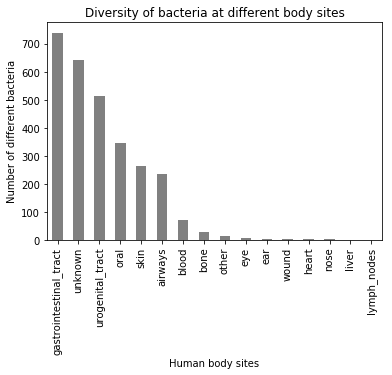

In [39]:
bac['HMP Isolation Body Site'].value_counts(ascending=False).plot(kind='bar',color='grey')
plt.ylabel('Number of different bacteria')
plt.xlabel('Human body sites')
plt.title('Diversity of bacteria at different body sites')

More Eukaryotic diversity exist in the blood, followed by skin, airways, , wound, unknown.  

In [40]:
euk=micro.loc[micro['Domain']=='EUKARYAL']
euk['HMP Isolation Body Site'].unique()

array(['unknown', 'skin', 'blood', 'wound', 'airways'], dtype=object)

Text(0.5,1,'Diversity of eukaryotes at different body sites')

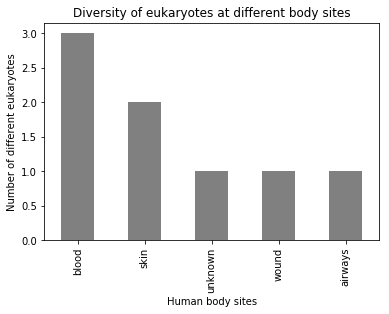

In [41]:
euk['HMP Isolation Body Site'].value_counts(ascending=False).plot(kind='bar',color='grey')
plt.ylabel('Number of different eukaryotes')
plt.xlabel('Human body sites')
plt.title('Diversity of eukaryotes at different body sites')

The study didn't find any precise location for viruses. Although, some previous studies have found virueses in blood, skin.

In [42]:
vir=micro.loc[micro['Domain']=='VIRUS']
vir['HMP Isolation Body Site'].unique()

array(['unknown'], dtype=object)

Archaea is found primarily in the gastrointestinal tract.

In [43]:
arc=micro.loc[micro['Domain']=='ARCHAEAL']
arc['HMP Isolation Body Site'].unique()

array(['gastrointestinal_tract'], dtype=object)

Next question that comes to mind is which is the most ubiquitous organism found in this analysis.  Staphylococcus is the most ubiquitous among all, with 11 habitats- urogenital_tract, skin,  airways, unknown, gastrointestinal_tract, nose, blood, bone, eye, ear, other.

                   HMP Isolation Body Site
Genus                                     
Staphylococcus                          11
Streptococcus                           10
Corynebacterium                          9
Enterococcus                             9
Actinomyces                              9
Haemophilus                              8
Propionibacterium                        8
Fusobacterium                            7
Prevotella                               7
Porphyromonas                            6
Klebsiella                               6
Bifidobacterium                          6
Lactobacillus                            6
Pseudomonas                              6
Neisseria                                6
Bacteroides                              5
Gemella                                  5
Rothia                                   5


Text(0.5,1,'Number of habitats for different microorganisms')

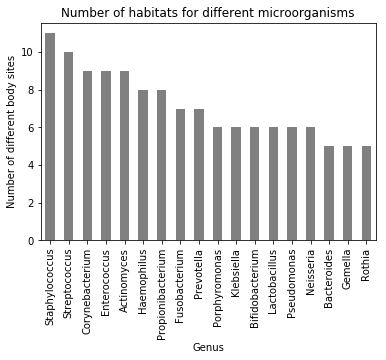

In [46]:
z=micro.groupby('Genus')['HMP Isolation Body Site'].nunique().sort_values(ascending=False)
y=pd.DataFrame(z)
w=y[y['HMP Isolation Body Site']>4]
print(w)
w.plot(kind='bar',color='grey',legend=False)
plt.ylabel('Number of different body sites')
plt.title('Number of habitats for different microorganisms')

In [47]:
staph=micro.loc[micro['Genus']=='Staphylococcus']
staph['HMP Isolation Body Site'].unique()

array(['urogenital_tract', 'skin', 'airways', 'unknown',
       'gastrointestinal_tract', 'nose', 'blood', 'bone', 'eye', 'ear',
       'other'], dtype=object)

Just to mention that this study, includes 2873 Bacteria, 8 eukaryotes, 6 viruses and 2 archaea.

In [49]:
micro['NCBI Superkingdom'].value_counts()

Bacteria     2873
Eukaryota       8
Viruses         6
Archaea         2
Name: NCBI Superkingdom, dtype: int64

Following is the list of names of viruses, eukaryotes and archaea.

In [50]:
viruses= micro[micro['NCBI Superkingdom'] =='Viruses']
viruses['Organism Name']

532            Actinomyces phage vB_Ana_GK1
2852    Pseudomonas phage F_HA0480sp/Pa1651
2853                Pseudomonas phage JBD18
2854                Pseudomonas phage JBD25
2855                Pseudomonas phage JBD26
2856                Pseudomonas phage JBD67
Name: Organism Name, dtype: object

In [51]:
eukaryotes= micro[micro['NCBI Superkingdom']=='Eukaryota']
eukaryotes['Organism Name']

601                  Exophiala dermatitidis NIH/UT8656
983                    Phialophora europaea CBS 101466
985     Mucor circinelloides f. circinelloides 1006PhL
999                     Pichia kudriavzevii CAB39-6420
1065                   Sporothrix schenckii ATCC 58251
2555                       Candida glabrata CAB52-4041
2556                   Candida tropicalis CAB54-6763-3
2557                   Candida parapsilosis CAB50-2638
Name: Organism Name, dtype: object

In [52]:
archaea= micro[micro['NCBI Superkingdom']=='Archaea']
archaea['Organism Name']

302    Methanobrevibacter smithii DSM 2374
303    Methanobrevibacter smithii DSM 2375
Name: Organism Name, dtype: object

### Conclusion
In this notebook we have performed EDA of the Human Microbiome dataset. Found- i) Gastrointestine shows most diversity of microbes, ii) *Streptomyces* sp. HGB0020 shows the maximum gene count in human, iii) *Streptococcus* is most common genus while *Staphylococcus* is most ubiquitous in humans.
